In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv("Husskonen_Solubility_Features.csv")
df

,0,Compound_Identifier,Source,SMILES,LogS.M.,MW,AMW,Sv,Se,Sp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50\r\r\n
0,1,HU_100,Huuskonen,c1ccc2ccc3nccnc3c2c1,-2.68,180.22,8.192,15.623,21.854,16.296,...,0,0,0,0,1,0,1,0,1,0
1,2,HU_1000,Huuskonen,c1cnc2c(C)ncnc2n1,-0.12,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
2,3,HU_1001,Huuskonen,c1cnc2cnc(C)nc2n1,-0.47,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
3,4,HU_1002,Huuskonen,c1c(C)nc2cncnc2n1,0.06,146.17,8.598,11.612,17.291,11.784,...,0,0,0,0,0,0,0,0,0,0
4,5,HU_1003,Huuskonen,c1cnc2c(OC)ncnc2n1,-1.11,162.17,9.009,12.327,18.618,12.239,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,928,HU_T2_5,Huuskonen,c1ccccc1N2C(=O)C=C(C)N2C,-0.56,188.25,7.240,16.392,25.949,17.273,...,0,0,0,0,1,0,1,0,1,0
928,929,HU_T2_6,Huuskonen,n(c(nc(n1)NC(C)C)NCC)c1Cl,-3.85,215.72,7.704,16.569,28.251,17.693,...,0,0,1,0,1,0,1,0,1,0
929,930,HU_T2_7,Huuskonen,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,-2.34,232.26,8.009,18.821,29.604,19.182,...,0,0,1,0,1,1,1,0,1,0
930,931,HU_T2_8,Huuskonen,O=C(N(C)C)Nc(ccc(c1Cl)Cl)c1,-3.80,233.11,9.713,16.047,24.596,16.989,...,0,0,0,0,1,0,1,0,1,0


1. Identify columns that are only strings then remove them

In [3]:
string_columns = []
#go through and look for columns that are strings
for i in df:
    for value in df[i]:
        if type(value) == str:
            string_columns.append(str(i))
            
#then to get rid of string only columns and weird 0 column
remove = list(set(string_columns))
df = df.drop(columns = remove)
df = df.drop(columns = ['0'])

In [4]:
df

,LogS.M.,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50\r\r\n
0,-2.68,180.22,8.192,15.623,21.854,16.296,24.242,0.710,0.993,0.741,...,0,0,0,0,1,0,1,0,1,0
1,-0.12,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,...,0,0,0,0,0,0,0,0,0,0
2,-0.47,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,...,0,0,0,0,0,0,0,0,0,0
3,0.06,146.17,8.598,11.612,17.291,11.784,19.408,0.683,1.017,0.693,...,0,0,0,0,0,0,0,0,0,0
4,-1.11,162.17,9.009,12.327,18.618,12.239,20.618,0.685,1.034,0.680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,-0.56,188.25,7.240,16.392,25.949,17.273,29.282,0.630,0.998,0.664,...,0,0,0,0,1,0,1,0,1,0
928,-3.85,215.72,7.704,16.569,28.251,17.693,32.512,0.592,1.009,0.632,...,0,0,1,0,1,0,1,0,1,0
929,-2.34,232.26,8.009,18.821,29.604,19.182,32.701,0.649,1.021,0.661,...,0,0,1,0,1,1,1,0,1,0
930,-3.80,233.11,9.713,16.047,24.596,16.989,27.170,0.669,1.025,0.708,...,0,0,0,0,1,0,1,0,1,0


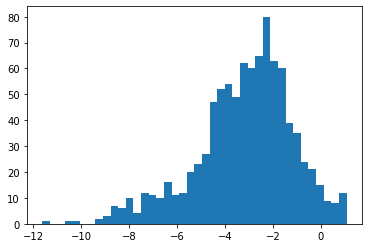

In [5]:
plt.hist(df['LogS.M.'], bins = 40)
plt.show()

In [8]:
X = df.drop(['LogS.M.'], axis = 1)
y = df['LogS.M.']

Now: identify features to eliminate using recursive feature elimination - remove poor features at an early stage

In [9]:
# function that tracks where each heading should be based on the values in the original dataframe
# old headings are replaced by new headings accordingly
# for features where all values are identical, it will always take the first feature that appears chronologically in the df
def rename_headings(df,original):
    # df = reduced dataframe after feature selection
    # original = original dataframe with all data
    rename = {}
    for heading in df:
        for oheading in original:
            count = 0
            for i in range(0,len(df[heading])):
                if df[heading][i] == original[oheading][i]:
                    count += 1
            if count == 24:
                rename.update({heading:oheading})
    df = df.rename(columns=rename)
    return df

In [12]:
#this defines the model
model = Ridge()

rfecv = sklearn.feature_selection.RFECV(model, step=1, cv=5)

#fit and transform data
new_data = rfecv.fit_transform(X, y)
new_data = pd.DataFrame(new_data)
new_data = rename_headings(new_data, df)
new_data.head()

,0,1,2,3,piPC08,5,6,7,8,9,...,22,23,24,25,26,27,28,F07[C-S],F01[C-Cl],F07[C-S]
0,14.761,25.495,25.495,51.108,-0.788,3.530,0.767,6.032,8.939,10.424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67,0.4,1.0
1,13.062,16.448,16.448,32.886,-1.224,3.162,0.551,5.989,8.925,10.445,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.4,1.0
2,13.200,16.849,16.849,33.687,-1.224,3.164,0.551,5.989,8.924,10.444,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.67,0.4,1.0
3,13.200,16.923,16.923,33.836,-1.224,3.164,0.551,5.989,8.925,10.445,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.4,1.0
4,13.788,19.674,19.674,39.279,-1.526,3.228,0.613,6.149,9.097,10.620,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.83,0.4,1.0


In [14]:
new_data

,0,1,2,3,piPC08,5,6,7,8,9,...,22,23,24,25,26,27,28,F07[C-S],F01[C-Cl],F07[C-S]
0,14.761,25.495,25.495,51.108,-0.788,3.530,0.767,6.032,8.939,10.424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67,0.4,1.0
1,13.062,16.448,16.448,32.886,-1.224,3.162,0.551,5.989,8.925,10.445,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.4,1.0
2,13.200,16.849,16.849,33.687,-1.224,3.164,0.551,5.989,8.924,10.444,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.67,0.4,1.0
3,13.200,16.923,16.923,33.836,-1.224,3.164,0.551,5.989,8.925,10.445,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.4,1.0
4,13.788,19.674,19.674,39.279,-1.526,3.228,0.613,6.149,9.097,10.620,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.83,0.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,14.975,31.693,31.693,63.314,-1.224,3.285,0.728,7.577,10.208,12.135,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.83,0.6,1.0
928,15.475,35.491,35.491,70.742,-1.337,3.119,0.689,6.126,9.029,10.534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,1.0
929,16.108,45.145,45.145,90.173,-1.758,3.826,0.986,8.575,11.181,13.160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.8,1.0
930,15.500,34.249,34.249,68.128,-1.103,3.339,0.752,7.648,10.315,12.214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.8,1.0


This recursive feature elimination has narrowed the dataset down to 32 descriptors. Next split dataset into a train and test set (80:20 ?) 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.inspection import permutation_importance

In [ ]:
%%time
%%capture

model = RandomForestRegressor()
hyparam = {'n_estimators': [25, 50, 100, 200],'max_depth':[None, 1, 3, 5, 10], 'min_samples_split':[2, 5, 10]}
rfr_grid = GridSearchCV(model, hyparam, cv=5, scoring='neg_mean_absolute_error')
rfr_grid.fit(X_train, y_train)

^ GridSearch to find the best parameters to run the RandomForestRegressor on. 